## 📁 현재 폴더 경로 확인

In [ ]:
import os
os.getcwd()

'/content'

## 👍 필수 모델 import


In [ ]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

## 📙 예측 할 주식 선정

In [ ]:
df=pd.read_csv("sample_data/SAMSUNG.csv")
print('Number of rows and columns:', df.shape)
df.head(5)

Number of rows and columns: (1231, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-20,41650,42100,41550,42000,36897.00781,15752397
1,2019-05-21,42600,43950,42350,43150,37907.28906,18812133
2,2019-05-22,43700,43800,42400,43500,38214.76172,11033339
3,2019-05-23,43900,44000,43250,43850,38522.23047,12259006
4,2019-05-24,43800,43800,42400,42700,37511.96484,13966305


## 데이터셋 가공

In [ ]:
training_set = df.iloc[:1000, 1:2].values
test_set = df.iloc[1000:, 1:2].values

In [ ]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
X_train = []
y_train = []
for i in range(60, 1000):
   X_train.append(training_set_scaled[i-60:i, 0])
   y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


## 📖 학습 시키기

In [ ]:
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
30/30 [==============================] - 15s 128ms/step - loss: 0.0388
Epoch 2/100
30/30 [==============================] - 4s 133ms/step - loss: 0.0098
Epoch 3/100
30/30 [==============================] - 5s 173ms/step - loss: 0.0084
Epoch 4/100
30/30 [==============================] - 4s 126ms/step - loss: 0.0076
Epoch 5/100
30/30 [==============================] - 4s 126ms/step - loss: 0.0071
Epoch 6/100
30/30 [==============================] - 6s 191ms/step - loss: 0.0061
Epoch 7/100
30/30 [==============================] - 4s 128ms/step - loss: 0.0065
Epoch 8/100
30/30 [==============================] - 6s 187ms/step - loss: 0.0062
Epoch 9/100
30/30 [==============================] - 7s 237ms/step - loss: 0.0060
Epoch 10/100
30/30 [==============================] - 6s 192ms/step - loss: 0.0053
Epoch 11/100
30/30 [==============================] - 4s 139ms/step - loss: 0.0053
Epoch 12/100
30/30 [==============================] - 6s 193ms/step - loss: 0.0061
Epoch 13/100

## 테스트 데이터 준비

In [ ]:
dataset_train = df.iloc[:1000, 1:2]
dataset_test = df.iloc[1000:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 291):
   X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(231, 60, 1)


## 테스트 세트를 이용하여 예측

In [ ]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

8/8 [==============================] - 2s 35ms/step


## 👁️👁️ 데이터 시각화

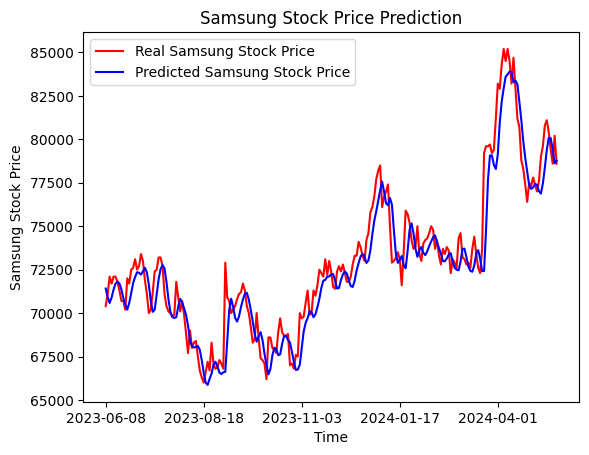

In [ ]:
plt.plot(df.loc[1000:, 'Date'],dataset_test.values, color = 'red', label = 'Real Samsung Stock Price')
plt.plot(df.loc[1000:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted Samsung Stock Price')
plt.xticks(np.arange(0,231,50))
plt.title('Samsung Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Samsung Stock Price')
plt.legend()
plt.show()